In [14]:
import pandas as pd # it's about to RAM
import numpy as np
import matplotlib.pyplot as plt

n_nodes=1000 # attention à ne pas override les graphs
n_turns=100
size_view=0.2
size_subset=0.1

Load

In [15]:
df = pd.read_csv('log.csv')
#df = pd.read_csv(f'log_{n_nodes}_{int(size_view*100)}.csv')
df.head()

,Id,Turn,Node,Age
0,1000,0,588,1
1,1000,0,34,1
2,1000,0,436,1
3,1000,0,923,1
4,1000,0,136,1


Plot it, **discovery rate**

In [16]:
discovery_rates = {}
discovered_sets = [set() for i in range(n_nodes+1)]
views = [[set() for turn in range(n_turns+1)]  for i in range(n_nodes+1)]
print(len(views[0]))
for turn in range(n_turns+1):
    turn_df = df[df['Turn']==turn]
    discovery_rates[turn]=[]    
    for i in range(1,n_nodes+1):
        discovered = discovered_sets[i]
        view = views[i][turn]
        node_df = turn_df[turn_df['Id']==i]
        [(discovered.add(_),view.add(_)) for _ in node_df['Node']]
        discovery_rates[turn].append(len(discovered)/n_nodes)

101


12


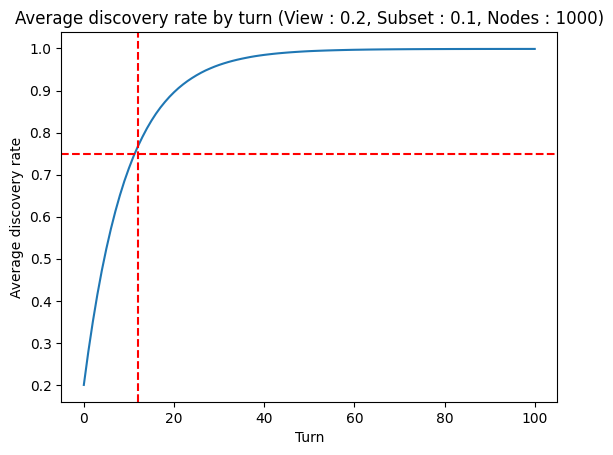

In [17]:
th = 0.75

turns = [_ for _ in range(n_turns+1)]
discovery_rates = [np.mean(discovery_rates[_]) for _ in turns]

import bisect 
def find_ge(rates, th):
    i = bisect.bisect_left(rates, th)
    return i
turn_th = find_ge(discovery_rates, th)
print(turn_th)
plt.plot(turns, discovery_rates)
plt.axhline(y=th, color='red', linestyle='--')  
plt.axvline(x=turn_th, color='red', linestyle='--')  
# Adding the title
plt.title(f"Average discovery rate by turn (View : {size_view}, Subset : {size_subset}, Nodes : {n_nodes})")
  
# Adding the labels
plt.ylabel("Average discovery rate")
plt.xlabel("Turn")
plt.show()

plot it, resiliency against **exiting nodes**

In [19]:
df[df['Age']==-1]
#df[df['Age']==-2]

,Id,Turn,Node,Age
395753,817,2,491,-2
398758,816,2,330,-2
401237,814,2,178,-2
8871553,426,44,113,-2
8905002,208,44,113,-2
...,...,...,...,...
22800017,682,114,113,-2
23517825,76,117,113,-2
24240143,508,121,113,-2
24268005,326,121,113,-2
